In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [3]:
#train_path = 'workspaces/machine-learning-python-template-ds-2023/image-classifier-project-tutorial/data'
#train_path = '..image-classifier-project-tutorial/data/train'
train_path = 'machine-learning-python-template-ds-2023/Rashid/image-classifier-project-tutorial/data'


In [4]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
train_path = os.path.join(project_root, 'image-classifier-project-tutorial', 'data', 'train')


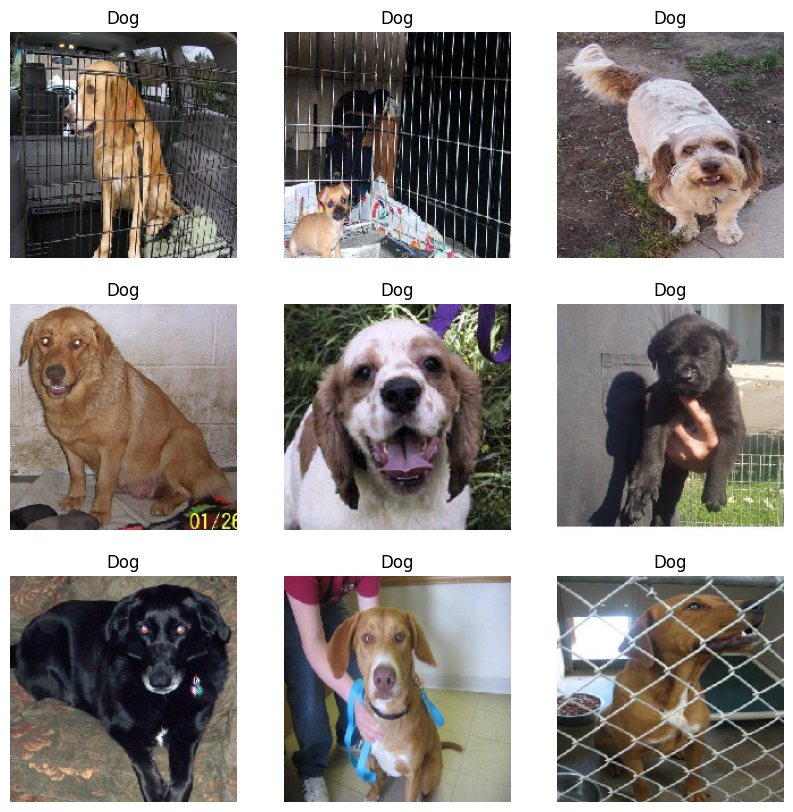

In [5]:
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Assuming the Jupyter Notebook is in the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
train_path = os.path.join(project_root, 'image-classifier-project-tutorial', 'data', 'train', 'dog')

# Check if the directory exists
if os.path.exists(train_path):
    # Get a list of all image file names in the training data directory (including subdirectories)
    dog_image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(train_path) for f in filenames if f.startswith('dog')]

    # Create an ImageDataGenerator for loading images
    image_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values between 0 and 1

    # Load the first nine dog images
    dog_images = []
for i in range(min(9, len(dog_image_files))):
    img_path = dog_image_files[i]
    img = load_img(img_path, target_size=(200, 200))
    img_array = img_to_array(img)
    dog_images.append(img_array)

# Display the first nine dog images in a single figure
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(dog_images[i] / 255.0)  # Normalize pixel values for display
    axes[i].axis('off')
    axes[i].set_title('Dog')

plt.show()



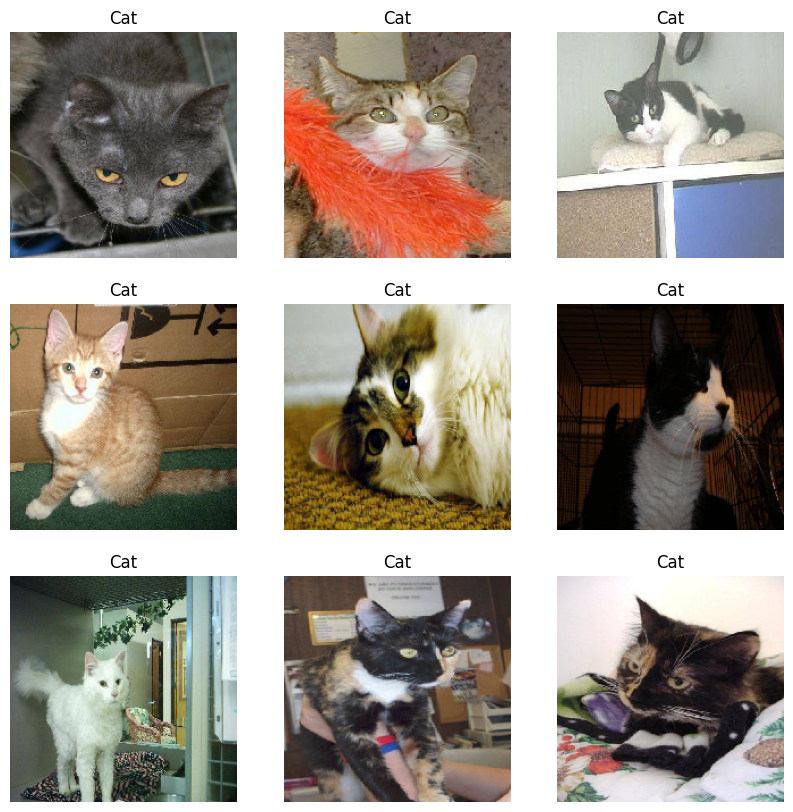

In [6]:
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Assuming the Jupyter Notebook is in the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
train_path_cat = os.path.join(project_root, 'image-classifier-project-tutorial', 'data', 'train', 'cat')

# Check if the directory exists
if os.path.exists(train_path_cat):
    # Get a list of all image file names in the training data directory (including subdirectories)
    cat_image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(train_path_cat) for f in filenames if f.startswith('cat')]

    # Create an ImageDataGenerator for loading images
    image_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values between 0 and 1

    # Load the first nine cat images
    cat_images = []
    for i in range(min(9, len(cat_image_files))):
        img_path = cat_image_files[i]
        img = load_img(img_path, target_size=(200, 200))
        img_array = img_to_array(img)
        cat_images.append(img_array)

    # Display the first nine cat images in a single figure
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()

    for i in range(9):
        axes[i].imshow(cat_images[i] / 255.0)  # Normalize pixel values for display
        axes[i].axis('off')
        axes[i].set_title('Cat')

    plt.show()
else:
    print(f"The directory '{train_path_cat}' does not exist.")


In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "./data/train" 

image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"]
    #class_mode=None
)

Found 24998 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalAveragePooling2D

model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Add Global Average Pooling Layer
model.add(GlobalAveragePooling2D())

# Simplified Dense Layers
model.add(Dense(units=1024, activation="relu"))
model.add(Dense(units=2, activation="softmax"))


In [9]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics=['accuracy'])

In [10]:
from PIL import Image
import os
import numpy as np

def validate_images(image_directory):
    for subdir, dirs, files in os.walk(image_directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                img = Image.open(filepath)
                img.verify()
                img = Image.open(filepath)  # Reopen as verify() closes the file
                img_array = np.array(img)  # Try converting to an array
            except Exception as e:
                print('Problem with file:', filepath, e)

validate_images("./data/train/cat")
validate_images("./data/train/dog")
validate_images("./data/test")


In [11]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(train_data, epochs=10, validation_data=train_data, callbacks=[early_stopping])

Epoch 1/10


2024-01-07 01:40:39.079687: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 163840000 exceeds 10% of free system memory.
2024-01-07 01:40:39.755790: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.
2024-01-07 01:40:39.815143: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81920000 exceeds 10% of free system memory.
2024-01-07 01:40:40.097156: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.
2024-01-07 01:40:40.439507: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.


782/782 [==============================] - 1502s 2s/step - loss: 0.6881 - accuracy: 0.6205 - val_loss: 0.6607 - val_accuracy: 0.5925
Epoch 2/10
782/782 [==============================] - 1530s 2s/step - loss: 0.5777 - accuracy: 0.6980 - val_loss: 0.5368 - val_accuracy: 0.7345
Epoch 3/10
782/782 [==============================] - 1493s 2s/step - loss: 0.5143 - accuracy: 0.7507 - val_loss: 0.4676 - val_accuracy: 0.7941
Epoch 4/10
782/782 [==============================] - 1509s 2s/step - loss: 0.4614 - accuracy: 0.7858 - val_loss: 0.4132 - val_accuracy: 0.8158
Epoch 5/10
782/782 [==============================] - 1466s 2s/step - loss: 0.4128 - accuracy: 0.8144 - val_loss: 0.3590 - val_accuracy: 0.8482
Epoch 6/10
782/782 [==============================] - 1467s 2s/step - loss: 0.3690 - accuracy: 0.8380 - val_loss: 0.3656 - val_accuracy: 0.8405
Epoch 7/10
782/782 [==============================] - 1460s 2s/step - loss: 0.3305 - accuracy: 0.8571 - val_loss: 0.3065 - val_accuracy: 0.8692
Epo

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.2083 - accuracy: 0.9116
Epoch 1: val_accuracy improved from -inf to 0.44688, saving model to ../models/vgg16_1.h5


/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 144s 1s/step - loss: 0.2083 - accuracy: 0.9116 - val_loss: 4.2939 - val_accuracy: 0.4469
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.2093 - accuracy: 0.9203
Epoch 2: val_accuracy improved from 0.44688 to 0.60312, saving model to ../models/vgg16_1.h5
100/100 [==============================] - 139s 1s/step - loss: 0.2093 - accuracy: 0.9203 - val_loss: 4.1458 - val_accuracy: 0.6031
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.2091 - accuracy: 0.9147
Epoch 3: val_accuracy did not improve from 0.60312
100/100 [==============================] - 141s 1s/step - loss: 0.2091 - accuracy: 0.9147 - val_loss: 4.1868 - val_accuracy: 0.5063


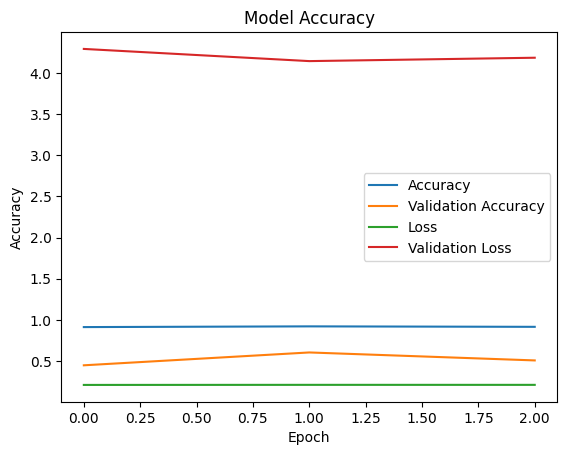

In [14]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

1/1 [==============================] - 0s 392ms/step
dog


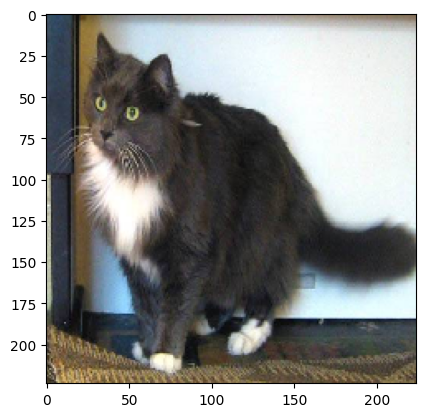

In [7]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("./data/train/test/9.jpg", target_size = (224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")
